In [1]:
#manipution des donnees

import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


In [5]:
train = pd.read_csv('/home/mosco/projets/python_folder/ia_projet/Titanic',encoding="cp1252",sep=",")
train.head(10)

NameError: name 'pd' is not defined

In [5]:
test = pd.read_csv('Data/test.csv',encoding="cp1252",sep=",")
test.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
# Fusionner  les donnees du train et test, 
# Ceci elimine les tracas lies a la manipulation des donnees 
merged = pd.concat([train,test],sort=False)
merged.head(4)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [7]:
# Voir dimension des donnees combinees
merged.shape

(1309, 11)

In [8]:
# voir les variables entetes de chaque colonne 
merged.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [9]:
# voirs les differentes donnees des differentes variables
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
survived    891 non-null float64
pclass      1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [10]:
# voir description des donnees des variables
merged.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


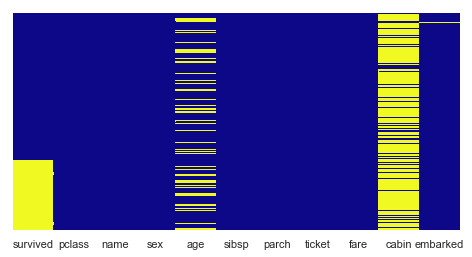

In [11]:
plt.figure(figsize=(8,4))
sns.heatmap(merged.isnull(), yticklabels=False, cbar=False, cmap='plasma')
plt.show()

In [12]:
# Nombre de variables manquantes
merged.isnull().sum()

survived     418
pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [13]:
# revoir donnees  cabin encore.
merged['cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: cabin, dtype: object

In [14]:
# nous voyons que Cabin contient des valeurs manquantes. comptons-les encore.
merged['cabin'].isnull().sum()

1014

In [15]:
#  comprenhension de la colonne Cabine.
merged['cabin'].value_counts().head()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
Name: cabin, dtype: int64

In [16]:
# Remplissage de toutes les variables null (NaNs)  de Cabin comme  'X'
merged['cabin'].fillna(value = 'X', inplace=True)

In [17]:
# Garder le 1er caracterede la cabine (voir)
merged['cabin'] = merged['cabin'].apply(lambda x: x[0])
merged['cabin'].value_counts()


X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64

In [18]:
#voir la colonne Nom..
merged['name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: name, dtype: object

In [19]:
# Extracting title from Name and create a new variable Title.
merged['Title'] = merged['name'].str.extract('([A-Za-z]+)\.')
merged['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [20]:
# voir les differentes categories de titre de la colonne Nom.
merged['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Jonkheer      1
Capt          1
Lady          1
Mme           1
Countess      1
Dona          1
Don           1
Sir           1
Name: Title, dtype: int64

In [21]:
# Replacer  Dr, Rev, Col, Major, Capt with 'Officer'
merged['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace=True)

# Replacer Dona, Jonkheer, Countess, Sir, Lady avec 'Aristocrate'
merged['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

#  Replacer Mlle and Ms with Miss. And Mme with Mrs.
merged['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [22]:
# Voyons a quoi ressemble le titre maintenant.
merged['Title'].value_counts()

Mr            757
Miss          264
Mrs           198
Master         61
Officer        23
Aristocrat      6
Name: Title, dtype: int64

In [23]:
# Voir Fusion de Sibsp et Parch et creation d'une nouvelle variable appelee 'Family_size'
merged['Family_size'] = merged.sibsp + merged.parch + 1  # Adding 1 for single person
merged['Family_size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

In [24]:
# Create buckets of single, small, medium, and large and then put respective values into them.
merged['Family_size'].replace(to_replace = [1], value = 'single', inplace = True)
merged['Family_size'].replace(to_replace = [2,3], value = 'small', inplace = True)
merged['Family_size'].replace(to_replace = [4,5], value = 'medium', inplace = True)
merged['Family_size'].replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

In [25]:
# let's see how 'Family_size' looks now
merged['Family_size'].value_counts()

single    790
small     394
medium     65
large      60
Name: Family_size, dtype: int64

In [26]:
# Revoir la variable Ticket.
merged['ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: ticket, dtype: object

In [27]:
# Assign N s'il n'y a que le nombre et pas de caractere. S'il y a un caractere, n'en extraire que le caractere.
ticket = []
for x in list(merged['ticket']):
    if x.isdigit():
        ticket.append('N')
    else:
         ticket.append(str(x).replace('.','').replace('/','').strip().split(' ')[0])
# Swap values
merged['ticket'] = ticket

In [28]:
# Voir et faire le point sur les categories ticket
merged['ticket'].value_counts()

N          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
SOC          8
C            8
SOPP         7
STONO2       7
SCAH         5
SCParis      5
PP           4
LINE         4
WEP          4
FC           3
SOTONO2      3
SWPP         2
PPP          2
SCA4         2
SC           2
STONOQ       1
CASOTON      1
AQ4          1
AQ3          1
SP           1
SCOW         1
LP           1
A            1
SOP          1
SCA3         1
Fa           1
AS           1
Name: ticket, dtype: int64

In [29]:
 # Voir et Garder seulement le 1er caractere pour reduire les categories de variable ticket
merged['ticket'] = merged['ticket'].apply(lambda x : x[0])
merged['ticket'].value_counts()

N    957
S     98
P     98
C     77
A     42
W     19
F     13
L      5
Name: ticket, dtype: int64

In [30]:
# Creez une fonction pour compter le nombre total de valeurs aberrantes..
def outliers(variable):
    global filtered # Le mot cle global est utilise dans une fonction uniquement lorsque nous voulons 
                    # effectuer des affectations ou modifier une variable.
     # Calculer 1ere, 3e  quartiles et iqr ou EI.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
      # Calculer la cloture inferieure et la cloture superieure pour les valeurs aberrantes
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Toutes les valeurs inferieures a l_fence et superieures a u_fence 
                                                     #sont des valeurs aberrantes.

        # Des observations qui sont aberrantes
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Laisser tomber les observations qui sont aberrantes

    filtered = variable.drop(outliers.index, axis = 0)

In [31]:
#Nombre Total de valeurs aberrantes dans le tarif
outliers(merged['fare'])

Total Outliers of fare : 171


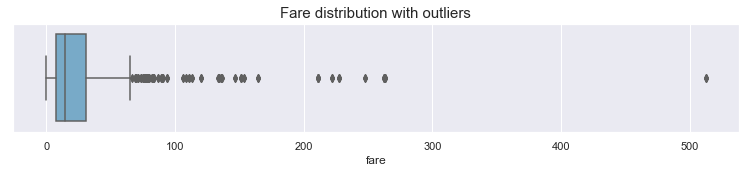

In [32]:
# Visualisation de la repartition des tarifs avec les valeurs aberrantes
plt.figure(figsize=(13, 2))
sns.boxplot(x=merged["fare"],palette='Blues')
plt.title('Fare distribution with outliers', fontsize=15 )
plt.show()

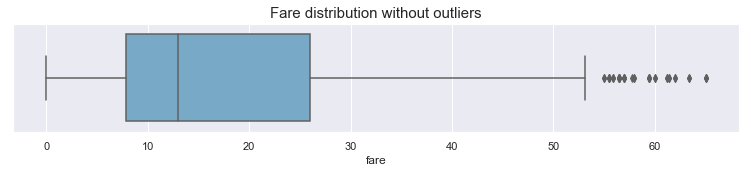

In [33]:
# Visualisation de la repartition des tarifs sans les valeurs aberrantes
plt.figure(figsize=(13, 2))
sns.boxplot(x=filtered,palette='Blues')
plt.title('Fare distribution without outliers', fontsize=15 )
plt.show()

In [34]:
# Total des nombres eloignes pour l'Age
outliers(merged['age'])

Total Outliers of age : 9


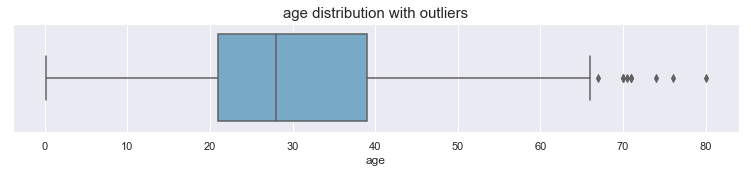

In [35]:
# Visualisation de la repartition de l'Age avec les valeurs aberrantes
plt.figure(figsize=(13, 2))
sns.boxplot(x=merged["age"],palette='Blues')
plt.title('age distribution with outliers', fontsize=15)
plt.show()


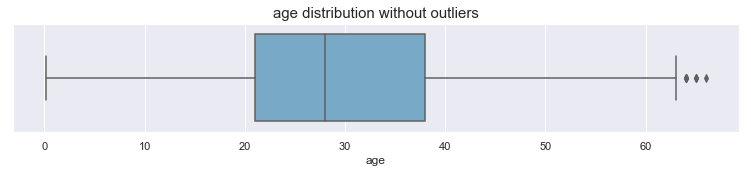

In [36]:
# Visualisation de la repartition de l'Age sans les valeurs aberrantes
plt.figure(figsize=(13, 2))
sns.boxplot(x=filtered,palette='Blues')
plt.title('age distribution without outliers', fontsize=15)
plt.show()

In [37]:
#(voir) comptons les valeurs manquantes pour chaque variable
merged.isnull().sum()

survived       418
pclass           0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin            0
embarked         2
Title            0
Family_size      0
dtype: int64

In [38]:
# voir et  imputer le mode embarque parce que le mode embarque est une variable categorique.
merged['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [39]:
#  Ici, S (port Southampton)  est la plus frequente
merged['embarked'].fillna(value = 'S', inplace = True)

In [40]:
# Imputez les valeurs manquantes de Fare. Le tarif est une variable numerique avec des valeurs aberrantes. 
# Par consequent, il sera impute par la mediane. '' '
merged['fare'].fillna(value = merged['fare'].median(), inplace = True)

In [41]:
df = merged.loc[:, ['sex', 'pclass', 'embarked', 'Title', 'Family_size', 'parch', 'sibsp', 'cabin', 'ticket']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) # donnees converties.
df.head(5)

,sex,pclass,embarked,Title,Family_size,parch,sibsp,cabin,ticket
0,1,2,2,3,3,0,1,8,0
1,0,0,0,4,3,0,1,2,5
2,0,2,2,2,2,0,0,8,6
3,0,0,2,4,3,0,1,2,4
4,1,2,2,3,2,0,0,8,4


In [42]:
# Insertion de L'age dans la variable de correlation 
df['age'] = merged['age']
# Deplacer l'age a l'indice 0.
df = df.set_index('age').reset_index()
df.head(2)


,age,sex,pclass,embarked,Title,Family_size,parch,sibsp,cabin,ticket
0,22.0,1,2,2,3,3,0,1,8,0
1,38.0,0,0,0,4,3,0,1,2,5


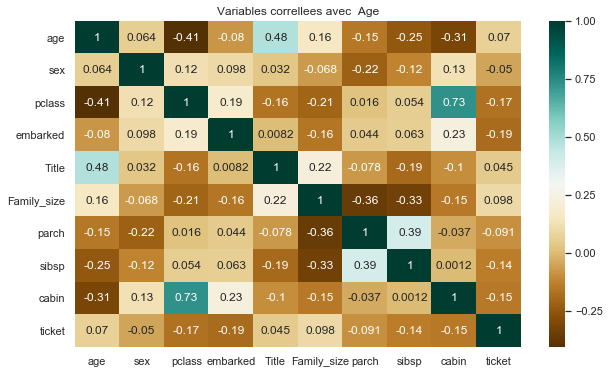

In [43]:
# (voir) Maintenant, creez la correlation "carte chaleur" de df
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap ='BrBG',annot = True)
plt.title('Variables correllees avec  Age')
plt.show()

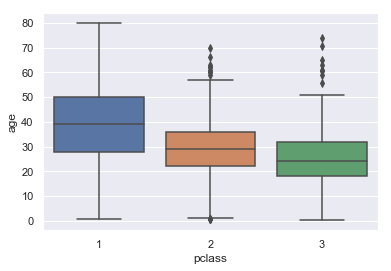

In [44]:
# Creer une boite a "moustaches" pour afficher les variables correlees et moyennes des variables Pclass et Title avec Age
# (voir) Boxplot b/w Pclass et Age
sns.boxplot(y='age', x='pclass', data=merged)
plt.show()

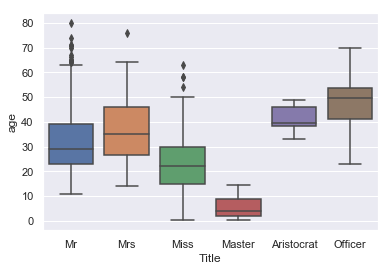

In [45]:
# (voir) Boxplot b/w Title et Age
sns.boxplot(y='age', x='Title', data=merged)
plt.show()

In [46]:
# Imputer l'Age avec la mediane des colonnes respectives (c'est a dire, le Titre et le Pclass)
merged['age'] = merged.groupby(['Title', 'pclass'])['age'].transform(lambda x: x.fillna(x.median()))

In [47]:
#Revoir encore les valeurs manquantes.
merged.isnull().sum()

survived       418
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin            0
embarked         0
Title            0
Family_size      0
dtype: int64

In [48]:
# Creer un  bin categorie pour l' Age 
label_names = ['infant', 'child', 'teenager','young_adult', 'adult', 'aged']

# Creer une plage pour chaque bin categrorie d'age
cut_points = [0,5,12,18,35,60,81]

#Creez et visualisez l'age categorise avec L'age original.
merged['Age_binned'] = pd.cut(merged['age'], cut_points, labels = label_names)

In [49]:
#voir Age avec Age categorise.
merged[['age', 'Age_binned']].head(2)

,age,Age_binned
0,22.0,young_adult
1,38.0,adult


In [50]:
# Creer un  bin categorie pour Tarif
groups = ['low','medium','high','very_high']

#Creer une gamme pour chaque "serie de categories" de tarifs
cut_points = [-1, 130, 260, 390, 520]

#Creez et visualisez Tarif categorise avec Tarif original.
merged['Fare_binned'] = pd.cut(merged.fare, cut_points, labels = groups)

In [51]:
# Tarif avec Tarif categorise original.
merged[['fare', 'Fare_binned']].head(5)

,fare,Fare_binned
0,7.2500,low
1,71.2833,low
2,7.9250,low
3,53.1000,low
4,8.0500,low


In [52]:
# (voir) verification du type de donnees
merged.dtypes

survived        float64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
Title            object
Family_size      object
Age_binned     category
Fare_binned    category
dtype: object

In [53]:
# Correction des types de donnees, conversion en variables categorielles.
merged.loc[:, ['pclass', 'sex', 'embarked', 'cabin', 'Title', 'Family_size', 'ticket']] = merged.loc[:, ['pclass', 'sex', 'embarked', 'cabin', 'Title', 'Family_size', 'ticket']].astype('category')

# En raison de la fusion, il existe des valeurs nuls "NaN" dans "Survivant" pour les observations du groupe de tests.
merged['survived'] = merged['survived'].dropna().astype('int') #Converting without dropping NaN throws an error


In [54]:
# voir et Verifier si les types de donnees ont ete corrigees
merged.dtypes

survived          int32
pclass         category
name             object
sex            category
age             float64
sibsp             int64
parch             int64
ticket         category
fare            float64
cabin          category
embarked       category
Title          category
Family_size    category
Age_binned     category
Fare_binned    category
dtype: object

In [55]:
# Revoir toutes les variables
merged.head(2)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Title,Family_size,Age_binned,Fare_binned
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,X,S,Mr,small,young_adult,low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C,C,Mrs,small,adult,low


In [56]:
# droping the feature that would not be useful anymore
merged.drop(columns = ['name', 'age','sibsp', 'parch','fare'], inplace = True, axis = 1)
merged.columns

Index(['survived', 'pclass', 'sex', 'ticket', 'cabin', 'embarked', 'Title',
       'Family_size', 'Age_binned', 'Fare_binned'],
      dtype='object')

In [57]:
#  Voir convertir les donnees categorielles en variables nulles
merged = pd.get_dummies(merged, drop_first=True)
merged.head(10)


,survived,pclass_2,pclass_3,sex_male,ticket_C,ticket_F,ticket_L,ticket_N,ticket_P,ticket_S,...,Family_size_single,Family_size_small,Age_binned_child,Age_binned_teenager,Age_binned_young_adult,Age_binned_adult,Age_binned_aged,Fare_binned_medium,Fare_binned_high,Fare_binned_very_high
0,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
5,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
7,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [58]:
# Laisser tomber l'identification du passager ID, du "train" et survivant du "test".
# train = train.drop(columns = ['PassengerId'], axis = 1)
# test = test.drop(columns = ['survived'], axis = 1)
test

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [64]:
# parametrage des donnees en entree et en sortie pour les modeles d'apprentissage machine
#X_train = train.drop(columns = ['survived'], axis = 1)
X_train = train[['pclass','sex','age','fare']]
train = train.dropna(axis=0)

y_train = train['survived']
le.fit(X_train["sex"].astype(str))
X_train ["sex"]=le.transform(X_train["sex"].astype(str))
X_train

,pclass,sex,age,fare
1,1,0,38.0,71.2833
3,1,0,35.0,53.1000
6,1,1,54.0,51.8625
10,3,0,4.0,16.7000
11,1,0,58.0,26.5500
21,2,1,34.0,13.0000
23,1,1,28.0,35.5000
27,1,1,19.0,263.0000
52,1,0,49.0,76.7292
54,1,1,65.0,61.9792


In [65]:
# Voir les dimensions des donnees input et output 
print('Input Matrix Dimension:  ', X_train.shape)
print('Output Vector Dimension: ', y_train.shape)

Input Matrix Dimension:   (183, 4)
Output Vector Dimension:  (183,)


In [66]:
# Maintenant initialisons tous les objects de classificateurs

#1.Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#2.KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#3.Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 40)

#4.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 40, n_estimators = 100)

#5.Support Vector Machines
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')



In [67]:
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy

In [68]:
# Faire un tableau sommaire de la precision du train.
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(knn), train_accuracy(dt), train_accuracy(rf), train_accuracy(svc)]})
train_accuracy.index = ['LR', 'KNN','DT', 'RF', 'SVC']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

# Voir precision du training des classificateurs
sorted_train_accuracy

,Train_accuracy(%)
DT,100.00
RF,100.00
SVC,92.90
LR,77.05
KNN,74.86


In [69]:
# Creer une fonction qui retourne le score moyen de validation croisee pour differents modeles
def val_score(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    val_score = np.round(val_score*100, 2)
    return val_score

In [70]:
# faire le tableau recapitulatif de la precision de la validation croisee.
val_score = pd.DataFrame({'val_score(%)':[val_score(lr), val_score(knn), val_score(dt), val_score(rf), val_score(svc)]})
val_score.index = ['LR', 'KNN','DT', 'RF', 'SVC']
sorted_val_score = val_score.sort_values(by = 'val_score(%)', ascending = False)

In [71]:
#precision de validation croisee des classificateurs
sorted_val_score

,val_score(%)
RF,78.04
DT,77.46
LR,75.32
SVC,67.78
KNN,66.14


In [72]:
# D'abord definir tous les hyperparametres du modele un par un.

# 1. Pour  logistic regression
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 2, 4, 8 ,10)}

# 2. Pour  KNN
knn_params = {'n_neighbors':[4,5,6,7,8,9,10],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'p':[1,2]}

# 3. Pour  DT
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[46]}

# 4. Pour  RF
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[ 10, 30, 200, 400],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[46]}
# 5. Pour  SVC
svc_params = {'C': [0.1, 1, 10,100], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': [ 1, 0.1, 0.001, 0.0001]}

In [73]:
# Creer une fonction pour regler les hyperparameters des modeles selectionnes.
def tune_hyperparameters(model, param_grid):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score # pour determiner les meilleurs parametres et meilleurs scores
    # Construire l'objet "grid search" avec 10 pli de validation croisee.
    grid = GridSearchCV(model, param_grid, verbose = 3, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score

In [74]:
# Parametrer les LR hyperparametres.
tune_hyperparameters(lr, param_grid=lr_params)
lr_best_params, lr_best_score =  best_params, best_score
print('LR Best Score:', lr_best_score)
print('And Best Parameters:', lr_best_params)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   22.7s


LR Best Score: 78.14
And Best Parameters: {'penalty': 'l2', 'C': 4.641588833612778}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   23.5s finished
C:\Users\Соро\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [75]:
# Parametrer les KNN hyperparametres
tune_hyperparameters(knn, param_grid=knn_params)
knn_best_params, knn_best_score =  best_params, best_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:   12.7s finished
C:\Users\Соро\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
# Parametrer les DT hyperparametres
tune_hyperparameters(dt, param_grid=dt_params)
dt_best_params, dt_best_score =  best_params, best_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 462 candidates, totalling 4620 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1976 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 3128 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 4536 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 4620 out of 4620 | elapsed:   44.8s finished
C:\Users\Соро\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
# Parametrer les RF hyperparametres
tune_hyperparameters(rf, param_grid=rf_params)
rf_best_params, rf_best_score =  best_params, best_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   35.1s


In [ ]:
# Comparer les scores de validation croisee avec les scores parametres pour differents modeles.
# Creez un DataFrame des scores parametres et les classer par ordre decroissant.
tunned_scores = pd.DataFrame({'Tunned_accuracy(%)': [lr_best_score, knn_best_score, dt_best_score, rf_best_score]})
tunned_scores.index = ['LR', 'KNN', 'DT', 'RF']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)

In [ ]:
# Models Accuracy after Optimization
sorted_tunned_scores

In [78]:
# Instancier les modeles avec des hyperparametres optimises.
lr = LogisticRegression (** lr_best_params)
knn = KNeighborsClassifier (** knn_best_params)
dt = DecisionTreeClassifier (** dt_best_params)
rf = RandomForestClassifier (** rf_best_params)

In [79]:
# Faire le train de tous les modeles avec les hyperparametres optimises 
models = { 'LR': lr, 'KNN':knn,'DT':dt,'RF':rf}

In [80]:
score = []
for x, (keys, items) in enumerate(models.items()):
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    from sklearn.model_selection import cross_val_score
    items.fit(X_train, y_train)
    scores = cross_val_score(items, X_train, y_train, cv = 10, scoring = 'accuracy')*100
    score.append(scores.mean())
    print('Mean Accuracy: %0.4f (+/- %0.4f) [%s]'  % (scores.mean(), scores.std(), keys))

Mean Accuracy: 79.6784 (+/- 11.7777) [RF]
Mean Accuracy: 78.0702 (+/- 9.9827) [LR]
Mean Accuracy: 75.8187 (+/- 11.8600) [DT]
Mean Accuracy: 69.9708 (+/- 5.4311) [KNN]


In [83]:
X_test = test[['pclass','sex','age','fare']]
test = test.dropna(axis=0)
le.fit(X_test["sex"].astype(str))
X_test ["sex"]=le.transform(X_test["sex"].astype(str))
X_test

,pclass,sex,age,fare
12,1,0,23.0,82.2667
14,1,0,47.0,61.1750
24,1,0,48.0,262.3750
26,1,0,22.0,61.9792
28,1,1,41.0,30.5000
34,1,1,30.0,57.7500
44,1,0,45.0,52.5542
46,1,1,45.0,29.7000
48,1,0,60.0,76.2917
50,1,1,24.0,60.0000


In [84]:
# Faire la prediction en utilisant tous les "models du trainning ou entraines"
model_prediction = pd.DataFrame({'LR':lr.predict(X_test), 'KNN':knn.predict(X_test), 'DT':dt.predict(X_test),'RF':rf.predict(X_test)})

In [87]:
#Tous les modeles de prediction 
model_prediction.head(100)

,DT,KNN,LR,RF
0,1,1,1,1
1,0,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,0,1
5,0,1,1,0
6,1,1,1,1
7,0,0,0,0
8,1,1,1,1
9,1,1,1,1
